# Melbourne Offenders by Gender

This portion of the project analyse Melbourne crime incidences by gender. We would look into;
1) Which gender is most likely to commit a offense 

2) Which Principal Offence is more likely to be committed by each gender

3) Any significant changes in the last 5 years

** Miscellaneous Offences are inclusive of Covid-related crime

Resources: https://www.abs.gov.au/statistics/people/crime-and-justice/recorded-crime-offenders/2020-21#victoria

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading in Data from file
filename = "offenders_detailed.csv"
file = f"resources\{filename}"
vic_offenders = pd.read_csv(file)
vic_offenders = vic_offenders.rename(columns={'Unnamed: 0': 'Year_Period'})
vic_offenders.head()

,Year_Period,Gender,Homicide and related offences,Acts intended to cause injury,Sexual assault and related offences,Dangerous_negligent acts,Abduction_harassment,Robbery_extortion,Unlawful entry with intent,Theft,Fare evasion,Fraud_deception,Illicit drug offences,Weapons_explosives,Property damage and environmental pollution,Public order offences,Offences against justice,Miscellaneous offences
0,2008–09,Male,146,9953,1243,578,534,399,2759,9172,0,1499,5471,2360,3295,6583,1360,7618
1,2009–10,Male,117,10122,1291,629,626,421,2544,9622,0,1487,5623,2241,3299,12198,1671,8351
2,2010–11,Male,89,9915,1159,653,619,453,2428,10087,0,1302,5409,2178,3166,13069,1815,9375
3,2011–12,Male,98,10558,1326,699,735,486,2246,11178,0,1401,6283,2533,3044,11513,2332,10387
4,2012–13,Male,108,12440,1333,696,896,463,2031,9656,0,1667,6859,3062,3092,11533,2554,12854


In [3]:
vic_offenders.columns

Index(['Year_Period', 'Gender', 'Homicide and related offences',
       'Acts intended to cause injury', 'Sexual assault and related offences',
       'Dangerous_negligent acts', 'Abduction_harassment', 'Robbery_extortion',
       'Unlawful entry with intent', 'Theft', 'Fare evasion',
       'Fraud_deception', 'Illicit drug offences', 'Weapons_explosives',
       'Property damage and environmental pollution', 'Public order offences',
       'Offences against justice', 'Miscellaneous offences'],
      dtype='object')

In [4]:
# Update all number fields to numeric
vic_offenders = vic_offenders.astype({'Homicide and related offences': 'int64', 
                                      'Acts intended to cause injury': 'int64', 
                                      'Sexual assault and related offences': 'int64', 
                                      'Dangerous_negligent acts': 'int64', 
                                      'Abduction_harassment': 'int64', 
                                      'Robbery_extortion':  'int64', 
                                      'Unlawful entry with intent': 'int64',
                                      'Theft': 'int64', 
                                      'Fare evasion': 'int64', 
                                      'Fraud_deception': 'int64', 
                                      'Illicit drug offences': 'int64', 
                                      'Weapons_explosives': 'int64', 
                                      'Property damage and environmental pollution': 'int64', 
                                      'Public order offences': 'int64', 
                                      'Offences against justice': 'int64',
                                      'Miscellaneous offences': 'int64'
                                     })
# Statistical overview of dataset
vic_offenders.describe()

,Homicide and related offences,Acts intended to cause injury,Sexual assault and related offences,Dangerous_negligent acts,Abduction_harassment,Robbery_extortion,Unlawful entry with intent,Theft,Fare evasion,Fraud_deception,Illicit drug offences,Weapons_explosives,Property damage and environmental pollution,Public order offences,Offences against justice,Miscellaneous offences
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,68.769231,7761.576923,760.423077,428.807692,643.884615,272.653846,1157.692308,5779.769231,496.230769,1148.000000,4156.038462,2034.346154,1727.961538,5113.038462,1848.807692,5545.115385
std,52.086319,5048.088701,722.148415,312.694102,506.326877,207.422649,859.790708,2430.474049,730.481009,398.334131,2579.245215,1649.180886,1171.816214,4227.819755,1312.543181,4287.053023
min,6.000000,2151.000000,28.000000,91.000000,91.000000,54.000000,291.000000,2453.000000,0.000000,600.000000,1091.000000,239.000000,535.000000,657.000000,396.000000,814.000000
25%,19.250000,3148.250000,66.250000,124.000000,241.000000,73.500000,370.750000,3738.250000,0.000000,784.500000,1933.000000,597.250000,610.000000,1517.750000,769.500000,1650.000000
50%,60.000000,6707.500000,622.000000,370.000000,431.000000,248.000000,866.000000,4840.000000,186.000000,1089.000000,3833.500000,1558.000000,1461.000000,2785.500000,1228.500000,5230.000000
75%,116.500000,13291.000000,1511.750000,737.750000,1147.000000,450.250000,1768.250000,6646.500000,497.500000,1513.250000,6695.500000,3481.000000,2823.500000,8621.500000,2966.000000,9119.000000
max,147.000000,14355.000000,1686.000000,896.000000,1598.000000,683.000000,2759.000000,11178.000000,2259.000000,1671.000000,7658.000000,4819.000000,3299.000000,13069.000000,4229.000000,14586.000000


# Principal Offences by Male

In [5]:
# data breakdown
# Retrieving last 5 years of Male data
vic_male_offenders = vic_offenders.loc[(vic_offenders['Gender'] == "Male")].sort_values('Year_Period', ascending=True).tail()
vic_male_offenders.describe()

,Homicide and related offences,Acts intended to cause injury,Sexual assault and related offences,Dangerous_negligent acts,Abduction_harassment,Robbery_extortion,Unlawful entry with intent,Theft,Fare evasion,Fraud_deception,Illicit drug offences,Weapons_explosives,Property damage and environmental pollution,Public order offences,Offences against justice,Miscellaneous offences
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,122.200000,13989.000000,1617.800000,803.800000,1423.000000,523.800000,1592.600000,4499.400000,1288.400000,1586.000000,6988.20000,4485.000000,2508.000000,6516.000000,3913.000000,7941.800000
std,16.634302,230.552597,59.381815,54.426097,112.760809,112.963268,188.049993,506.211715,519.378764,81.856582,491.85384,532.779504,217.915121,2106.517624,206.066737,3768.494288
min,94.000000,13737.000000,1532.000000,760.000000,1311.000000,379.000000,1308.000000,3617.000000,516.000000,1485.000000,6464.00000,3553.000000,2279.000000,3544.000000,3697.000000,5356.000000
25%,123.000000,13898.000000,1596.000000,767.000000,1350.000000,468.000000,1532.000000,4568.000000,1010.000000,1550.000000,6649.00000,4533.000000,2331.000000,5360.000000,3767.000000,6111.000000
50%,126.000000,13920.000000,1617.000000,796.000000,1394.000000,525.000000,1602.000000,4655.000000,1482.000000,1554.000000,6842.00000,4731.000000,2472.000000,7044.000000,3914.000000,6562.000000
75%,131.000000,14035.000000,1658.000000,800.000000,1462.000000,564.000000,1748.000000,4808.000000,1713.000000,1670.000000,7340.00000,4789.000000,2669.000000,7675.000000,3958.000000,7094.000000
max,137.000000,14355.000000,1686.000000,896.000000,1598.000000,683.000000,1773.000000,4849.000000,1721.000000,1671.000000,7646.00000,4819.000000,2789.000000,8957.000000,4229.000000,14586.000000


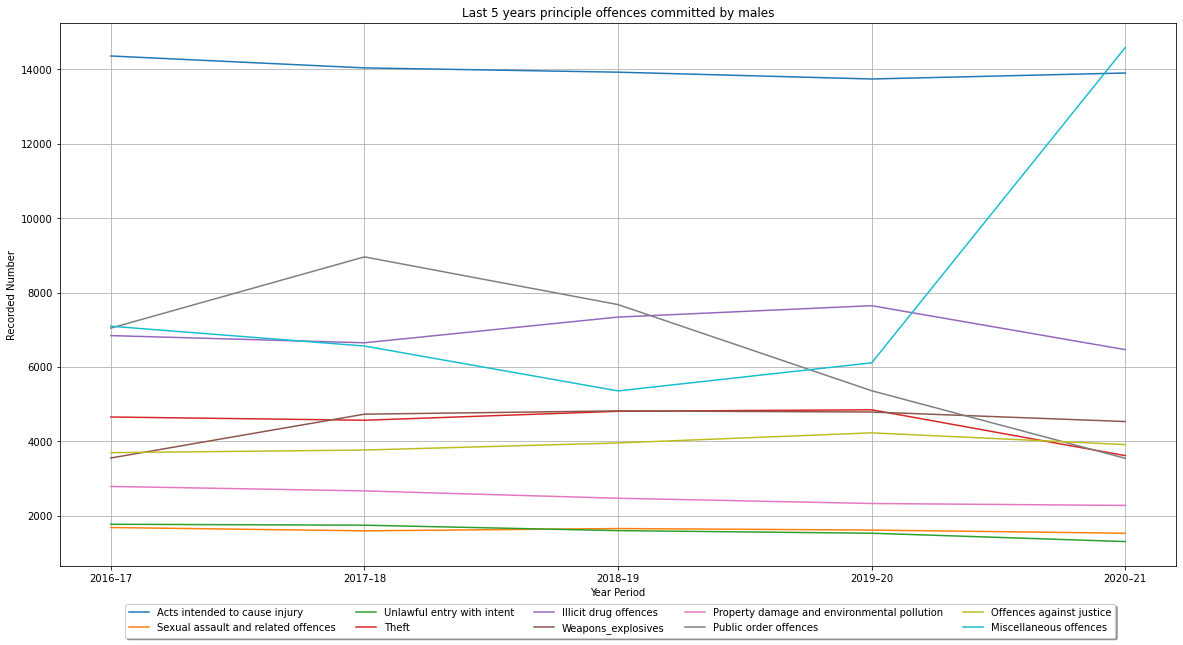

In [18]:
# Line graph to show trend in the last 5 years
plt.figure(figsize=(20, 10))
for col in vic_male_offenders.columns:
    if not (col == 'Year_Period' or col == 'Gender' or col == 'Total'):
        plt.plot(vic_male_offenders['Year_Period'], vic_male_offenders[col], label= col)

plt.title(f"Last 5 years principle offences committed by males")
plt.xlabel("Year Period")
plt.ylabel("Recorded Number")
plt.grid(True)
plt.legend(bbox_to_anchor=(0.95, -0.06), fancybox=True, shadow=True, ncol=5)
plt.show()


In [21]:
least_offence_male = []
# Top 10 crimes by male
vic_male_offenders_tally = vic_male_offenders.drop(['Year_Period', 'Gender'], axis=1).sum().sort_values(ascending=False).reset_index()
vic_male_offenders_tally = vic_male_offenders_tally.rename(columns={'index': 'Principal Offences', 0: 'Total Count'})
top10Crimes_male = vic_male_offenders_tally.head(10)

# Number of offences excluded from top 10
# least_count_male = len(vic_male_offenders_tally) - len(top10Crimes_male)

# Load least commited offences into a list
for i in np.arange(10, len(vic_male_offenders_tally)):
    least_offence_male.append(vic_male_offenders_tally['Principal Offences'][i])

    # Show top 10 Principal Offences
top10Crimes_male

,Principal Offences,Total Count
0,Acts intended to cause injury,69945
1,Miscellaneous offences,39709
2,Illicit drug offences,34941
3,Public order offences,32580
4,Theft,22497
5,Weapons_explosives,22425
6,Offences against justice,19565
7,Property damage and environmental pollution,12540
8,Sexual assault and related offences,8089
9,Unlawful entry with intent,7963


## Top 10 Principal Offences by Male

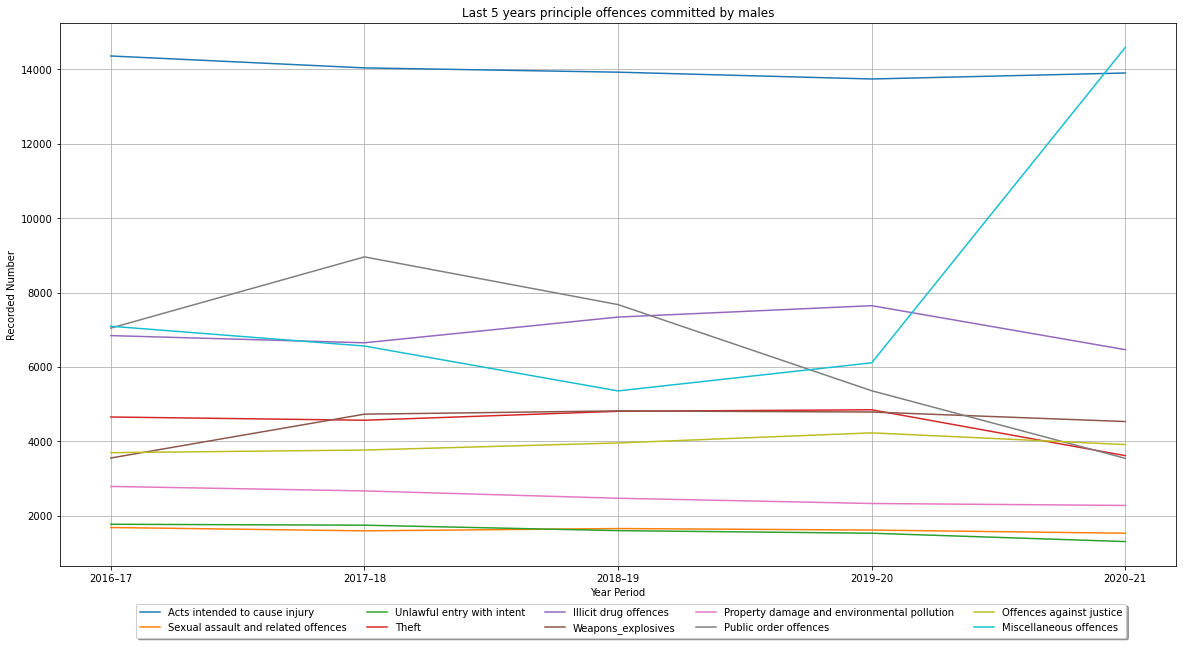

In [22]:
# Line graph to show trend in the last 5 years
# Removing offences not in the top 10
for exCol in least_offence_male:
    vic_male_offenders = vic_male_offenders.drop(exCol, axis=1, errors='ignore')

# Plotting graph
plt.figure(figsize=(20, 10))
for col in vic_male_offenders.columns:
    if not (col == 'Year_Period' or col == 'Gender' or col == 'Total' or col == 'exCol'):
        plt.plot(vic_male_offenders['Year_Period'], vic_male_offenders[col], label= col)
plt.title(f"Last 5 years principle offences committed by males")
plt.xlabel("Year Period")
plt.ylabel("Recorded Number")
plt.grid(True)
plt.legend(bbox_to_anchor=(0.96, -0.06), fancybox=True, shadow=True, ncol=5)
plt.show()


# Principal Offences by Female

In [9]:
# data breakdown
# Retrieving last 5 years of female data
vic_female_offenders = vic_offenders.loc[(vic_offenders['Gender'] == "Female")].sort_values('Year_Period', ascending=True).tail()
vic_female_offenders.describe()

,Homicide and related offences,Acts intended to cause injury,Sexual assault and related offences,Dangerous_negligent acts,Abduction_harassment,Robbery_extortion,Unlawful entry with intent,Theft,Fare evasion,Fraud_deception,Illicit drug offences,Weapons_explosives,Property damage and environmental pollution,Public order offences,Offences against justice,Miscellaneous offences
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,22.600000,3419.800000,80.600000,148.400000,296.000000,96.40000,348.600000,3378.600000,254.000000,833.800000,2060.400000,843.000000,580.000000,1152.200000,1011.600000,1957.000000
std,6.107373,61.120373,4.560702,15.093045,32.457665,22.54551,34.602023,541.070513,81.786307,61.296003,137.360111,103.164917,35.057096,370.100932,93.548383,1779.483211
min,17.000000,3343.000000,73.000000,123.000000,259.000000,62.00000,291.000000,2453.000000,111.000000,727.000000,1931.000000,687.000000,535.000000,657.000000,866.000000,814.000000
25%,18.000000,3378.000000,81.000000,149.000000,264.000000,87.00000,344.000000,3437.000000,261.000000,840.000000,1939.000000,792.000000,559.000000,889.000000,980.000000,1039.000000
50%,20.000000,3431.000000,81.000000,151.000000,307.000000,106.00000,359.000000,3476.000000,294.000000,856.000000,2045.000000,886.000000,577.000000,1278.000000,1032.000000,1305.000000
75%,27.000000,3447.000000,83.000000,157.000000,322.000000,107.00000,374.000000,3713.000000,297.000000,870.000000,2129.000000,912.000000,609.000000,1375.000000,1083.000000,1523.000000
max,31.000000,3500.000000,85.000000,162.000000,328.000000,120.00000,375.000000,3814.000000,307.000000,876.000000,2258.000000,938.000000,620.000000,1562.000000,1097.000000,5104.000000


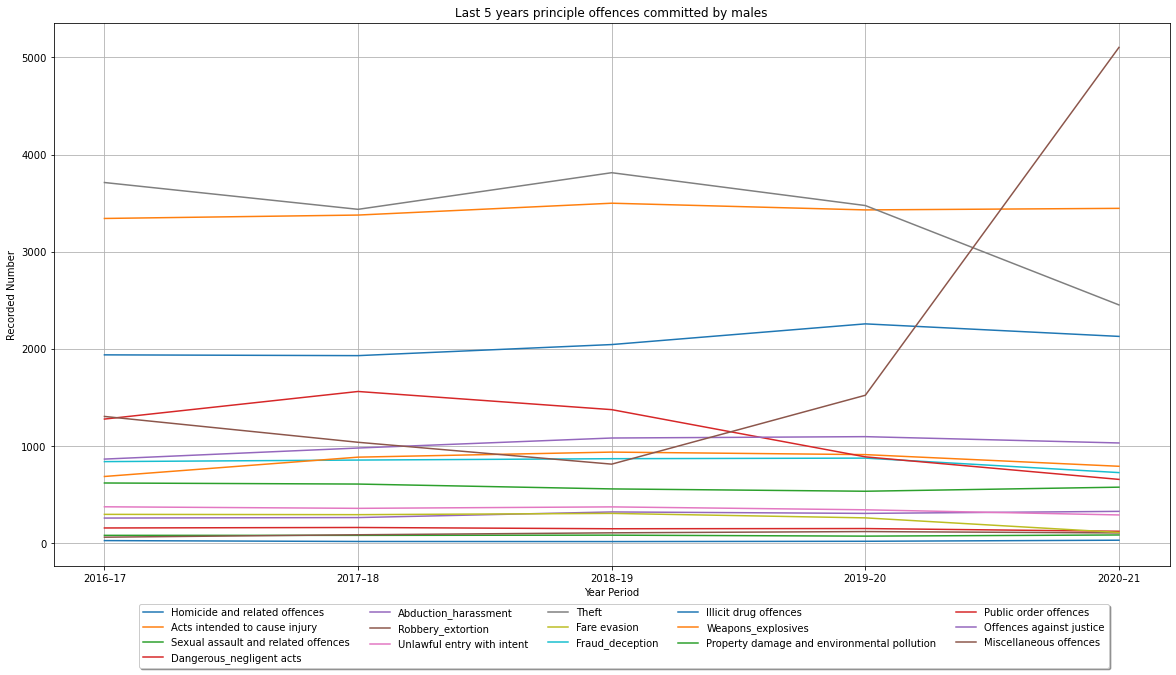

In [20]:
# Line graph to show trend in the last 5 years
plt.figure(figsize=(20, 10))
for col in vic_female_offenders.columns:
    if not (col == 'Year_Period' or col == 'Gender' or col == 'Total'):
        plt.plot(vic_female_offenders['Year_Period'], vic_female_offenders[col], label= col)

plt.title(f"Last 5 years principle offences committed by males")
plt.xlabel("Year Period")
plt.ylabel("Recorded Number")
plt.grid(True)
plt.legend(bbox_to_anchor=(0.95, -0.06), fancybox=True, shadow=True, ncol=5)
plt.show()



In [24]:
least_offence_female = []
# Top 10 crimes by female
vic_female_offenders_tally = vic_female_offenders.drop(['Year_Period', 'Gender'], axis=1).sum().sort_values(ascending=False).reset_index()
vic_female_offenders_tally = vic_female_offenders_tally.rename(columns={'index': 'Principal Offences', 0: 'Total Count'})
top10Crimes_female = vic_female_offenders_tally.head(10)

# Load least commited offences into a list
for i in np.arange(10, len(vic_female_offenders_tally)):
    least_offence_female.append(vic_female_offenders_tally['Principal Offences'][i])

    # Show top 10 Principal Offences
top10Crimes_female

,Principal Offences,Total Count
0,Acts intended to cause injury,17099
1,Theft,16893
2,Illicit drug offences,10302
3,Miscellaneous offences,9785
4,Public order offences,5761
5,Offences against justice,5058
6,Weapons_explosives,4215
7,Fraud_deception,4169
8,Property damage and environmental pollution,2900
9,Unlawful entry with intent,1743


## Top 10 Principal Offences by female

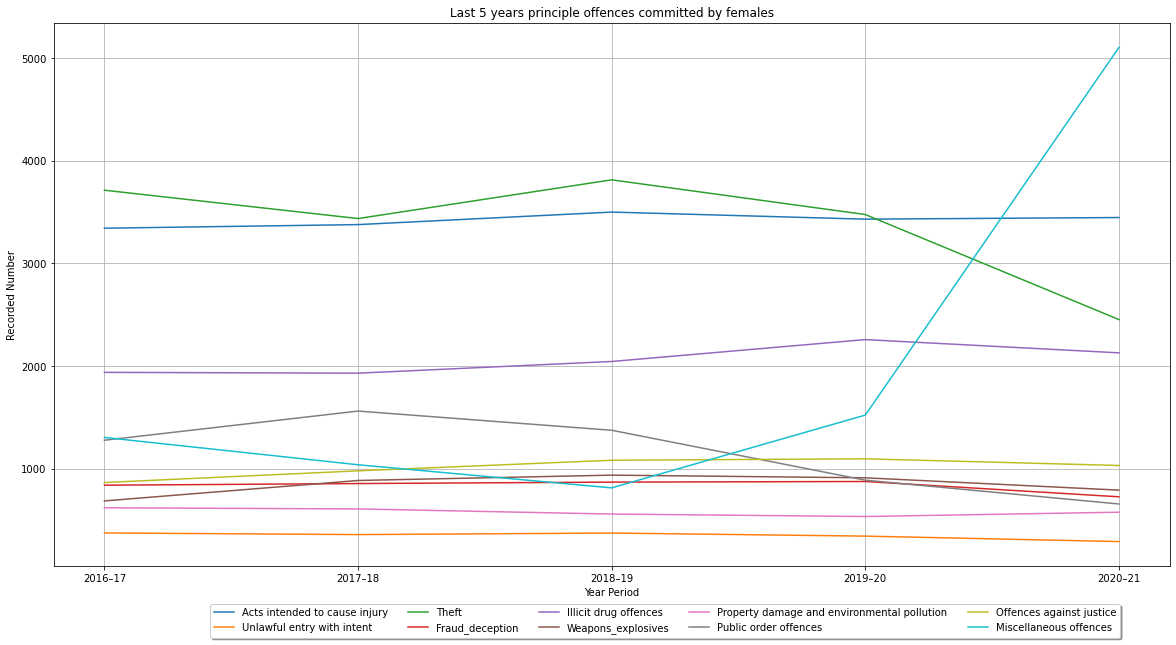

In [30]:
# Line graph to show trend in the last 5 years
# Removing offences not in the top 10
for exCol in least_offence_female:
    vic_female_offenders = vic_female_offenders.drop(exCol, axis=1, errors='ignore')

# Plotting graph
plt.figure(figsize=(20, 10))
for col in vic_female_offenders.columns:
    if not (col == 'Year_Period' or col == 'Gender' or col == 'Total' or col == 'exCol'):
        plt.plot(vic_female_offenders['Year_Period'], vic_female_offenders[col], label= col)
plt.title(f"Last 5 years principle offences committed by females")
plt.xlabel("Year Period")
plt.ylabel("Recorded Number")
plt.grid(True)
plt.legend(bbox_to_anchor=(0.96, -0.06), fancybox=True, shadow=True, ncol=5)
plt.show()

# Combined overview

In [210]:
vic_male_current = vic_male_offenders.tail(1)
vic_female_current = vic_female_offenders.tail(1)

In [211]:
vic_male_current_p = pd.DataFrame({'offences': vic_male_current.drop(['Year_Period', 'Gender'], axis =1, errors = 'ignore').columns, 
                                'Gender': 'Male'})
vic_male_current_p['count'] = 0
for i in np.arange(0, len(vic_male_current_p)):
    offence_name = vic_male_current_p['offences'][i]
    for index, row in vic_male_current.iterrows():
        vic_male_current_p.loc[i, 'count'] = row[offence_name]
        
vic_female_current_p = pd.DataFrame({'offences': vic_female_current.drop(['Year_Period', 'Gender'], axis =1, errors = 'ignore').columns, 
                                'Gender': 'Female'})
vic_female_current_p['count'] = 0
for i in np.arange(0, len(vic_female_current_p)):
    offence_name = vic_female_current_p['offences'][i]
    for index, row in vic_female_current.iterrows():
        vic_female_current_p.loc[i, 'count'] = row[offence_name]
        
complete_offenders = pd.concat([vic_male_current_p, vic_female_current_p]).reset_index(drop=True)
complete_offenders

,offences,Gender,count
0,Acts intended to cause injury,Male,13898
1,Sexual assault and related offences,Male,1532
2,Unlawful entry with intent,Male,1308
3,Theft,Male,3617
4,Illicit drug offences,Male,6464
5,Weapons_explosives,Male,4533
6,Property damage and environmental pollution,Male,2279
7,Public order offences,Male,3544
8,Offences against justice,Male,3914
9,Miscellaneous offences,Male,14586


In [249]:
complete_offence_list = list(dict.fromkeys(complete_offenders['offences']))

facecolor = '#eaeaf2'
font_color = '#525252'
hfont = {'fontname':'Calibri'}
labels = ['Female', 'Male']
size = 0.3
vals = complete_offenders['count']

group_sum = complete_offenders.groupby('Gender')['count'].sum()

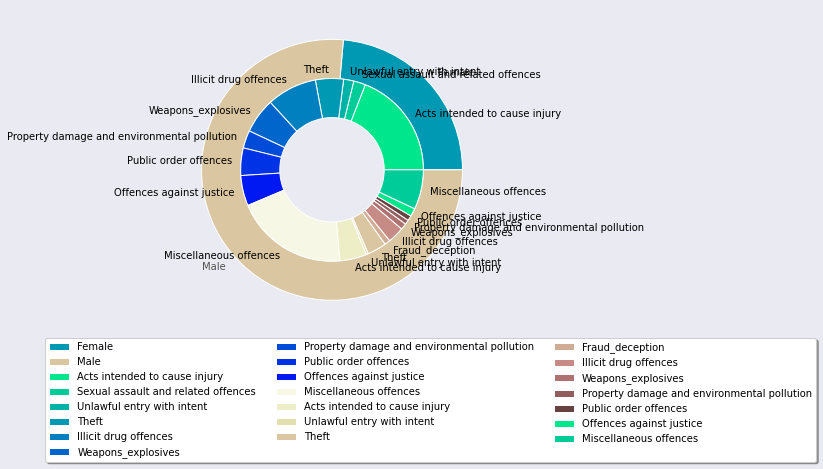

In [253]:
fig, ax = plt.subplots(figsize=(10,6), facecolor=facecolor)
a,b = [plt.cm.winter, plt.cm.pink]

outer_colors = [a(.6), b(.6)]
inner_colors = [a(.9), a(.8),a(.7), a(.6),a(.5), a(.4),a(.3), a(.2),a(.1), 
                b(.9), b(.8),b(.7), b(.6),b(.5), b(.4),b(.3), b(.2),b(.1)]

ax.pie(group_sum, 
       radius=1, 
       colors=outer_colors, 
       labels=labels, 
       textprops={'color':font_color},
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals, 
       radius=1-size, # size=0.3
       colors=inner_colors,
       labels =complete_offenders['offences'],
       wedgeprops=dict(width=size, edgecolor='w'))

plt.legend(bbox_to_anchor=(2, 0), fancybox=True, shadow=True, ncol=3)
plt.show()